In [1]:
from automatic_differentiation import Variable
import automatic_differentiation as ad
import graphviz
import numpy as np

In [2]:
x = Variable('x')
x

Variable(name='x')

In [3]:
f = x + 1
f

Node(name='x + 1', operation='+', operands=('x', 1))

In [4]:
f.gradient_fn(1)

((Variable(name='x'), array(1, dtype=object)),
 (Constant(name='1', value=1.0), array(1.)))

In [5]:
f.operands

(Variable(name='x'), Constant(name='1', value=1.0))

digraph {
  labelloc="t"
  label="Evaluation graph"
  var_115c54f10 [shape=box, label="+"];
  var_115c54f10 -> var_110c81c10;
  var_115c54f10 -> var_115c54e80;
  var_110c81c10 [label="x"];
  var_115c54e80 [label="1"];
}


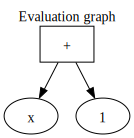

In [6]:
print(f.graph)
graphviz.Source(f.graph)

In [7]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
f = ((x ** 2 + 1) - 1 / y) ** 3 + ad.log(z)
f

Node(name='(x ** 2 + 1 - 1 / y) ** 3 + log(z)', operation='+', operands=('(x ** 2 + 1 - 1 / y) ** 3', 'log(z)'))

digraph {
  labelloc="t"
  label="Evaluation graph"
  var_115c7cd60 [shape=box, label="+"];
  var_115c7cd60 -> var_115c7cb50;
  var_115c7cd60 -> var_115c7cc40;
  var_115c7cb50 [shape=box, label="**"];
  var_115c7cb50 -> var_115c7c730;
  var_115c7cb50 -> var_115c7cac0;
  var_115c7c730 [shape=box, label="-"];
  var_115c7c730 -> var_115c7c220;
  var_115c7c730 -> var_115c7c970;
  var_115c7c220 [shape=box, label="+"];
  var_115c7c220 -> var_115c7c400;
  var_115c7c220 -> var_115c7c340;
  var_115c7c400 [shape=box, label="**"];
  var_115c7c400 -> var_115c6a9a0;
  var_115c7c400 -> var_115c7c4c0;
  var_115c6a9a0 [label="x"];
  var_115c7c4c0 [label="2"];
  var_115c7c340 [label="1"];
  var_115c7c970 [shape=box, label="/"];
  var_115c7c970 -> var_115c7c0a0;
  var_115c7c970 -> var_115c6a580;
  var_115c7c0a0 [label="1"];
  var_115c6a580 [label="y"];
  var_115c7cac0 [label="3"];
  var_115c7cc40 [shape=box, label="log"];
  var_115c7cc40 -> var_115c7c280;
  var_115c7c280 [label="z"];
}


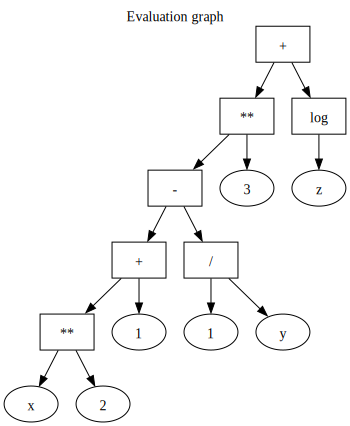

In [8]:
print(f.graph)
graphviz.Source(f.graph)

In [9]:
f.evaluate_at(x=2, y=3, z=4)

103.01592399074954

digraph {
  labelloc="t"
  label="Evaluation graph"
  var_115c7cd60 [shape=box, label="+"];
  var_115c7cd60 -> var_115c7cb50;
  var_115c7cd60 -> var_115c7cc40;
  var_115c7cb50 [shape=box, label="**"];
  var_115c7cb50 -> var_115c7c730;
  var_115c7cb50 -> var_115c7cac0;
  var_115c7c730 [shape=box, label="-"];
  var_115c7c730 -> var_115c7c220;
  var_115c7c730 -> var_115c7c970;
  var_115c7c220 [shape=box, label="+"];
  var_115c7c220 -> var_115c7c400;
  var_115c7c220 -> var_115c7c340;
  var_115c7c400 [shape=box, label="**"];
  var_115c7c400 -> var_115c6a9a0;
  var_115c7c400 -> var_115c7c4c0;
  var_115c6a9a0 [label="x"];
  var_115c7c4c0 [label="2"];
  var_115c7c340 [label="1"];
  var_115c7c970 [shape=box, label="/"];
  var_115c7c970 -> var_115c7c0a0;
  var_115c7c970 -> var_115c6a580;
  var_115c7c0a0 [label="1"];
  var_115c6a580 [label="y"];
  var_115c7cac0 [label="3"];
  var_115c7cc40 [shape=box, label="log"];
  var_115c7cc40 -> var_115c7c280;
  var_115c7c280 [label="z"];
}


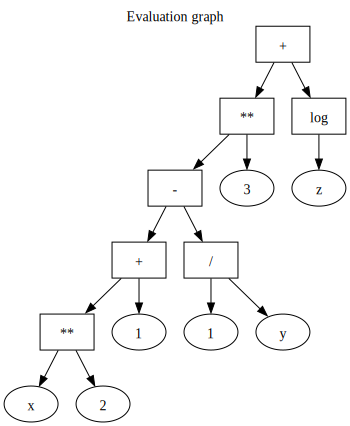

In [10]:
print(f.graph)
graphviz.Source(f.graph)

In [11]:
A = Variable('A')
B = Variable('B')
C = Variable('C')
formula = A @ B + C
print(f"f(A, B) = {formula}")
formula

f(A, B) = A @ B + C


Node(name='A @ B + C', operation='+', operands=('A @ B', 'C'))

In [12]:
A_val = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B_val = np.ones((10, 5))
C_val = np.random.randn(10, 5)

evaluation = formula.evaluate_at(A=A_val, B=B_val, C=C_val)
print(f"f(A, B) = \n{evaluation}")
evaluation

f(A, B) = 
[[ 0.3951456   0.87977017  2.22845211 -0.11544233  0.44898723]
 [ 0.34560672  1.9557647   3.79114399  1.46371365  1.81940892]
 [ 4.54415963  3.22859817  1.58465458  1.91133425  4.0910726 ]
 [ 3.5637994   5.00326418  3.93616659  4.91966725  2.41055351]
 [ 4.3518162   5.89107129  3.52431165  4.54057229  4.24187764]
 [ 8.25270522  7.65941132  7.06267834  6.62406544  5.97268188]
 [ 7.87978496  7.79874237  5.40119521  7.61961203  7.29031833]
 [ 6.18378574  7.86131819  6.88607082  7.58972614  7.57673005]
 [ 8.55072551 10.00687205  9.95966472  8.08442407  8.76106604]
 [ 9.64842567  9.70318818  8.88982197  8.79064876  7.52753248]]


array([[ 0.3951456 ,  0.87977017,  2.22845211, -0.11544233,  0.44898723],
       [ 0.34560672,  1.9557647 ,  3.79114399,  1.46371365,  1.81940892],
       [ 4.54415963,  3.22859817,  1.58465458,  1.91133425,  4.0910726 ],
       [ 3.5637994 ,  5.00326418,  3.93616659,  4.91966725,  2.41055351],
       [ 4.3518162 ,  5.89107129,  3.52431165,  4.54057229,  4.24187764],
       [ 8.25270522,  7.65941132,  7.06267834,  6.62406544,  5.97268188],
       [ 7.87978496,  7.79874237,  5.40119521,  7.61961203,  7.29031833],
       [ 6.18378574,  7.86131819,  6.88607082,  7.58972614,  7.57673005],
       [ 8.55072551, 10.00687205,  9.95966472,  8.08442407,  8.76106604],
       [ 9.64842567,  9.70318818,  8.88982197,  8.79064876,  7.52753248]])

In [13]:
grads = formula.grads
print(f"df(A, B)/dA = \n{grads[A]}")
print(f"df(A, B)/dB = \n{grads[B]}")
print(f"df(A, B)/dC = \n{grads[C]}")

df(A, B)/dA = 
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
df(A, B)/dB = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]
df(A, B)/dC = 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [14]:
print(formula.graph)
formula.graph

digraph {
  labelloc="t"
  label="Evaluation graph"
  var_115c863a0 [shape=box, label="+"];
  var_115c863a0 -> var_115c861f0;
  var_115c863a0 -> var_115c86760;
  var_115c861f0 [shape=box, label="@"];
  var_115c861f0 -> var_115c867f0;
  var_115c861f0 -> var_115c86340;
  var_115c867f0 [label="A"];
  var_115c86340 [label="B"];
  var_115c86760 [label="C"];
}


'digraph {\n  labelloc="t"\n  label="Evaluation graph"\n  var_115c863a0 [shape=box, label="+"];\n  var_115c863a0 -> var_115c861f0;\n  var_115c863a0 -> var_115c86760;\n  var_115c861f0 [shape=box, label="@"];\n  var_115c861f0 -> var_115c867f0;\n  var_115c861f0 -> var_115c86340;\n  var_115c867f0 [label="A"];\n  var_115c86340 [label="B"];\n  var_115c86760 [label="C"];\n}'

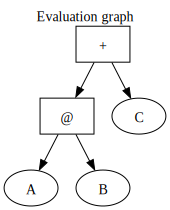

In [15]:
graphviz.Source(formula.graph)

In [16]:
more = formula + np.random.randn(10, 5)
more

Node(name='A @ B + C + ndarray(10, 5)', operation='+', operands=('A @ B + C', ndarray(10, 5)))

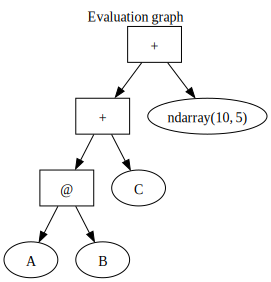

In [17]:
graphviz.Source(more.graph)

In [18]:
test = ad.einsum('ij,jk->ik', A, B)
test

einsum(subscripts='ij,jk->ik', A, B)

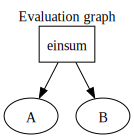

In [19]:
graphviz.Source(test.graph)

In [20]:
A_val = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B_val = np.ones((10, 5))

evaluation = test.evaluate_at(A=A_val, B=B_val)
print(f"f(A, B) = \n{evaluation}")
evaluation

f(A, B) = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]


array([[ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.],
       [ 9.,  9.,  9.,  9.,  9.],
       [10., 10., 10., 10., 10.]])

In [21]:
grads = test.grads
print(f"df(A, B)/dA = \n{grads[A]}")
print(f"df(A, B)/dB = \n{grads[B]}")

df(A, B)/dA = 
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
df(A, B)/dB = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]


In [22]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
formula = ad.einsum('ij, kl, mn -> mnij', x, y, z)

x_val = np.array([[1.0, -2.0], [5.0, 3.0]])
y_val = np.array([[3.0, 2.0], [-7.0, 4.0]])
z_val = np.array([[1.0, 0.0], [0.0, -1.0]])

result = formula.evaluate_at(x=x_val, y=y_val, z=z_val)
result

array([[[[  2.,  -4.],
         [ 10.,   6.]],

        [[  0.,   0.],
         [  0.,   0.]]],


       [[[  0.,   0.],
         [  0.,   0.]],

        [[ -2.,   4.],
         [-10.,  -6.]]]])

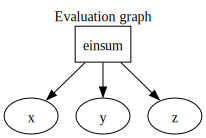

In [23]:
graphviz.Source(formula.graph)

In [24]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
formula = (x ** 2 + y ** 3) * z - ad.einsum('ij, jk -> ik', x, y)
formula

Node(name='(x ** 2 + y ** 3) * z - einsum(subscripts='ij,jk->ik', x, y)', operation='-', operands=('(x ** 2 + y ** 3) * z', 'einsum(subscripts='ij,jk->ik', x, y)'))

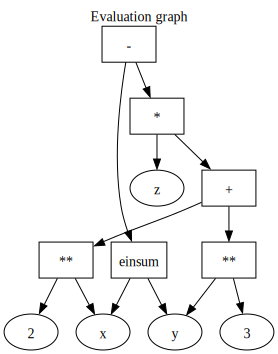

In [25]:
graphviz.Source(formula.graph)